In [1]:
import pandas as pd

df = pd.read_csv('./data/final_df.csv')

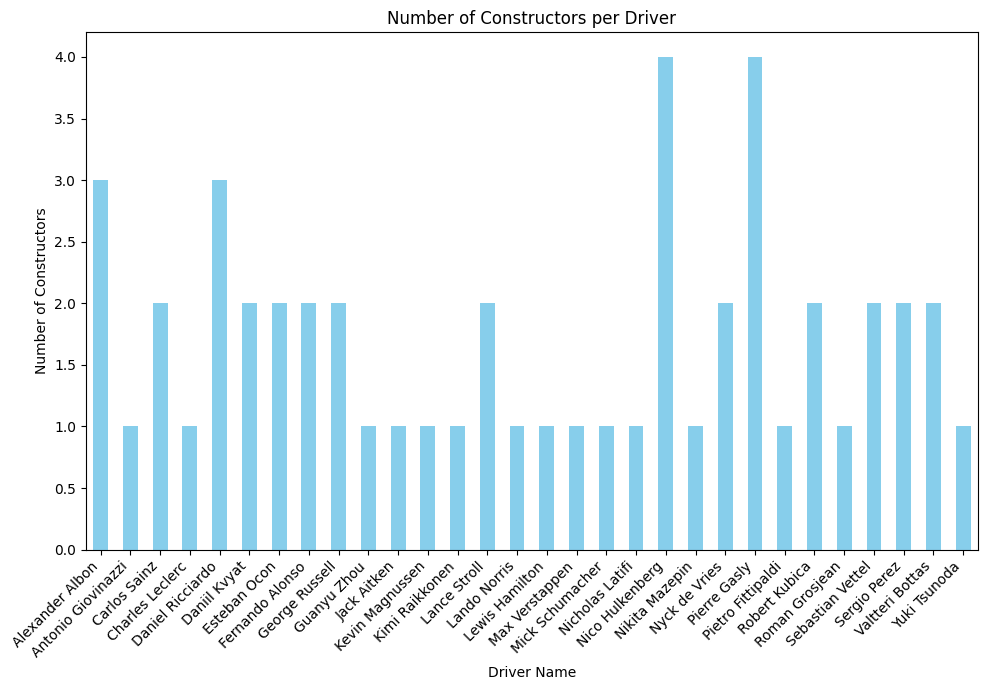

In [2]:
import matplotlib.pyplot as plt

grouped_data = df.groupby('driver_name')['constructor_name'].nunique()

plt.figure(figsize=(10,7))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Number of Constructors per Driver')
plt.ylabel('Number of Constructors')
plt.xlabel('Driver Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

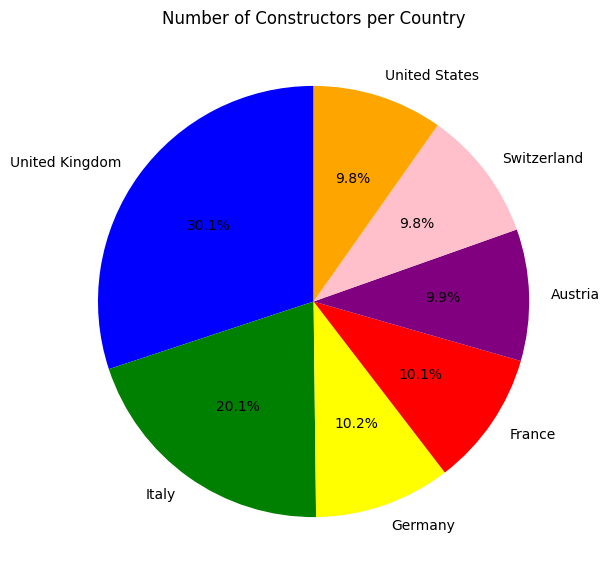

In [3]:
country_counts = df['constructor_country'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90,
        colors = ['blue', 'green', 'yellow', 'red', 'purple', 'pink', 'orange'])
plt.title('Number of Constructors per Country')
plt.show()

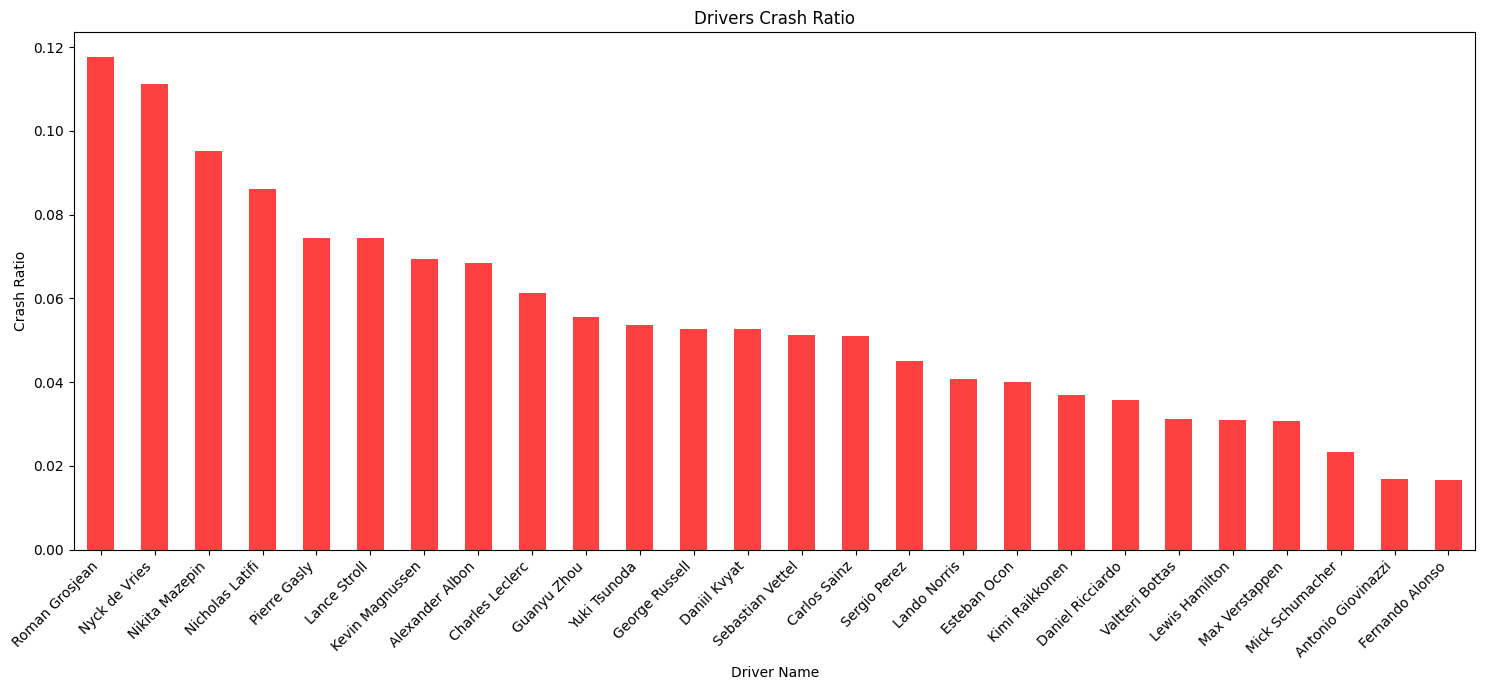

In [4]:
collision_data = df[df['status'].str.contains('collision', case=False, na=False)]
total_races = df['driver_name'].value_counts()
total_collisions = collision_data['driver_name'].value_counts()

crash_ratio = total_collisions / total_races
crash_ratio = crash_ratio.dropna()
crash_ratio = crash_ratio.sort_values(ascending=False)

plt.figure(figsize=(15,7))
crash_ratio.plot(kind='bar', color='red', alpha=0.75)
plt.title('Drivers Crash Ratio')
plt.xlabel('Driver Name')
plt.ylabel('Crash Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

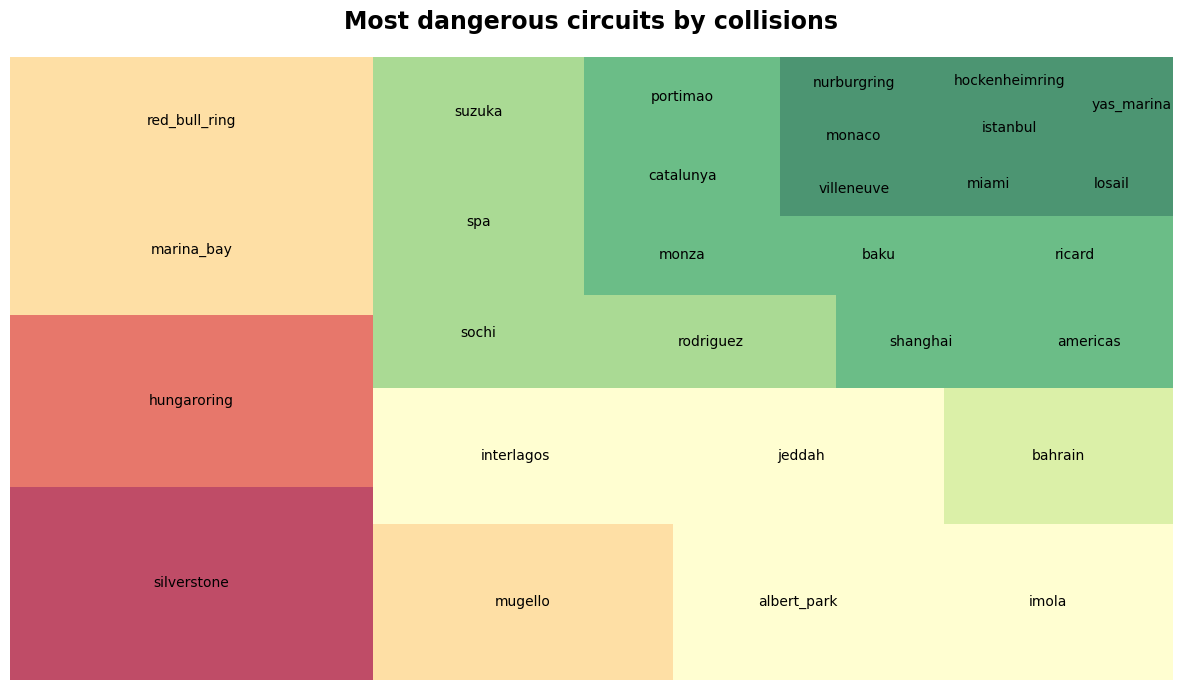

In [5]:
import squarify

collision_data = df[df['status'].str.contains('collision', case=False, na=False)]
collision_counts = collision_data.groupby('circuit_id').size().reset_index(name='counts')
collision_counts = collision_counts.sort_values(by='counts', ascending=False)

cmap = plt.cm.RdYlGn_r
mini = min(collision_counts['counts'])
maxi = max(collision_counts['counts'])
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in collision_counts['counts']]

fig, ax = plt.subplots(figsize=(12, 7))
squarify.plot(sizes=collision_counts['counts'], label=collision_counts['circuit_id'], alpha=.7, color=colors)
plt.title("Most dangerous circuits by collisions", fontsize=17, fontweight="bold", pad=20)  # added padding for better visualization
plt.axis('off')
plt.tight_layout()
plt.show()

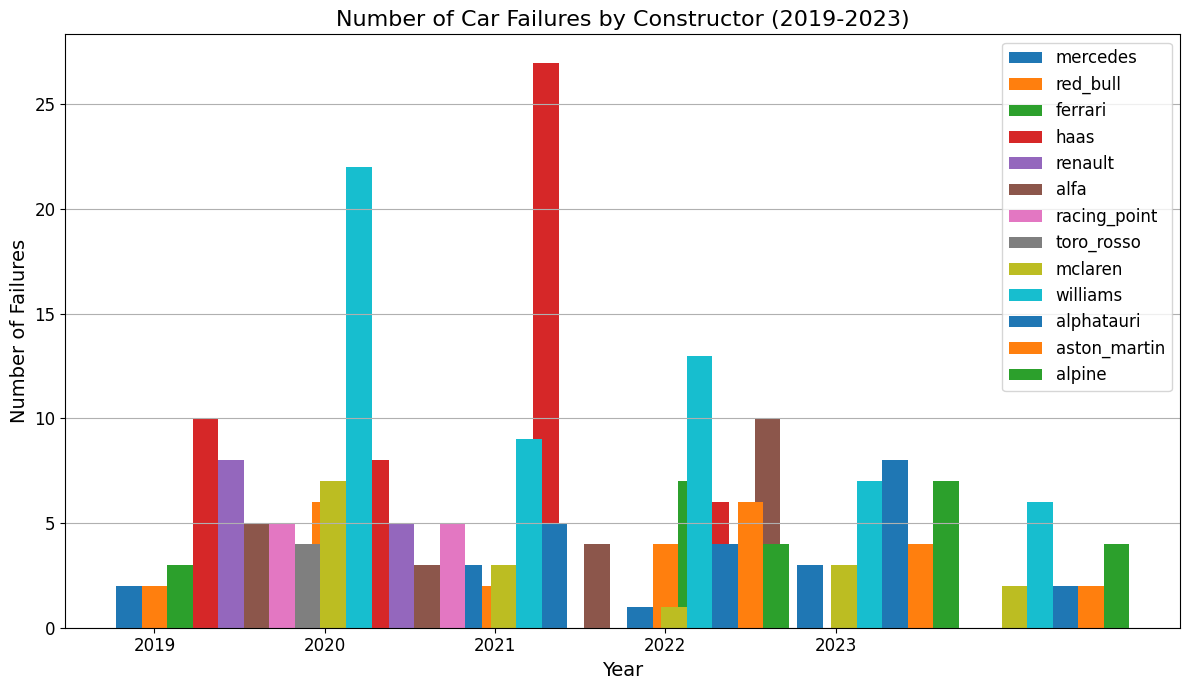

In [6]:
import numpy as np

years = [2019, 2020, 2021, 2022, 2023]
constructors = df['constructor'].unique()
failure_data = {}

for year in years:
    year_df = df[df['season'] == year]
    filtered_df = year_df[~year_df['status'].str.contains('Finished|^\+\d+ Lap$') & ~year_df['status'].str.contains('Collision', case=False)]
    failure_counts = filtered_df.groupby('constructor').size()
    
    for constructor in constructors:
        if constructor not in failure_data:
            failure_data[constructor] = []
        failure_data[constructor].append(failure_counts.get(constructor, 0))

bar_width = 0.15
r = np.arange(len(years))

plt.figure(figsize=(12, 7))

for index, (constructor, failures) in enumerate(failure_data.items()):
    plt.bar(r + index * bar_width, failures, width=bar_width, label=constructor)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
plt.title('Number of Car Failures by Constructor (2019-2023)', fontsize=16)
plt.xticks(r + bar_width, [str(year) for year in years], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()
